In [103]:
# SQL config

import pyodbc
import pandas as pd
con = pyodbc.connect('Trusted_Connection=yes', driver = '{SQL Server}',server = , database = 'allocations_2011')
cursor = con.cursor()


In [2]:


sql= '''


With cte

as (

Select 
u.id as userid
,u.created_on as usercreated
,d.id deviceid
,d.device_type
,d.created_on devicecreated
,a.campaign
,a.created_on
,max(a.created_on) over (partition by u.id) as [max_date]
,min (a.created_on) over (partition by u.id) as [min_date]
,row_number() over (partition by u.id order by a.created_on) as rownumber

from User_clean u inner join
user_device ud on ud.user_id=u.id inner join
device d on d.id=ud.device_id  inner join
attribution a on a.device_id=d.id  and a.created_on<=u.created_on
where  d.created_on <= u.created_on  and dateadd(dd,-2,u.created_on)< d.created_on) 

Select *
from cte
where cte.rownumber = 1
order by cte.userid asc,cte.created_on desc


'''
df = pd.read_sql(sql, con)


In [ ]:
sql= '''

With cte

as (

Select 
u.id as userid
,u.created_on as usercreated
,d.id deviceid
,d.device_type
,d.created_on devicecreated
,a.campaign
,a.created_on
,max(a.created_on) over (partition by u.id) as [max_date]
,min (a.created_on) over (partition by u.id) as [min_date]
,row_number() over (partition by u.id order by a.created_on) as rownumber

from User_clean u inner join
user_device ud on ud.user_id=u.id inner join
device d on d.id=ud.device_id  inner join
attribution a on a.device_id=d.id  and a.created_on<=u.created_on
where  d.created_on <= u.created_on  and dateadd(dd,-2,u.created_on)< d.created_on) 

Select cte.campaign,count(cte.campaign) cntofcampaign
from cte
where cte.rownumber = 1
group by cte.campaign
order by count(cte.campaign) desc

'''
df6 = pd.read_sql(sql, con)

In [44]:
sql1= '''
select count(salesid) salescnt,
sum(cast(amount as int)) saleamt,
--,RIGHT(CONVERT(VARCHAR(8),date, 3), 5) AS [mm/yy]
(convert(varchar(10), date, 120) )saledate,
year(date) year,
weekday
from sale
group by  
--RIGHT(CONVERT(VARCHAR(8),date, 3), 5)  
(convert(varchar(10), date, 120) ),weekday,year(date)
order by (convert(varchar(10), date, 120))
'''

df1 = pd.read_sql(sql1,con)

In [46]:
df1['saledate']= pd.to_datetime(df1['saledate'])

In [47]:
df1.dtypes

salescnt             int64
saleamt              int64
saledate    datetime64[ns]
year                 int64
weekday              int64
dtype: object

In [49]:
df1=df1.set_index('saledate')
df1['month'] = df1.index.month
df1['weekdayname'] = df1.index.weekday_name

In [50]:
df1.head(5)

,salescnt,saleamt,year,weekday,month,weekdayname
saledate,,,,,,
2013-11-05,1,2361,2013,1,11,Tuesday
2013-11-18,1,215,2013,0,11,Monday
2013-11-20,1,502,2013,2,11,Wednesday
2013-11-22,1,2316,2013,4,11,Friday
2013-11-24,1,1243,2013,6,11,Sunday


In [128]:
#df1.loc['2016-01-01':'2017-12-01']
#df1.loc['2017']
#df1.loc['2017-01']

Text(0, 0.5, 'Sales in qty')

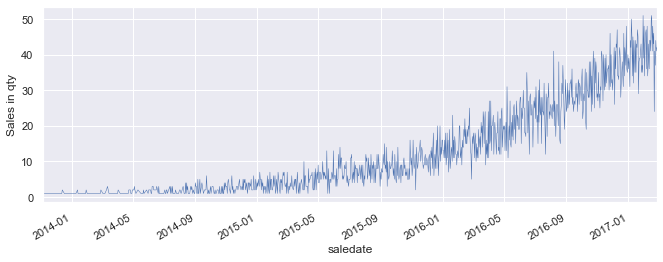

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
df1['salescnt'].plot(linewidth=.5).set_ylabel('Sales in qty')

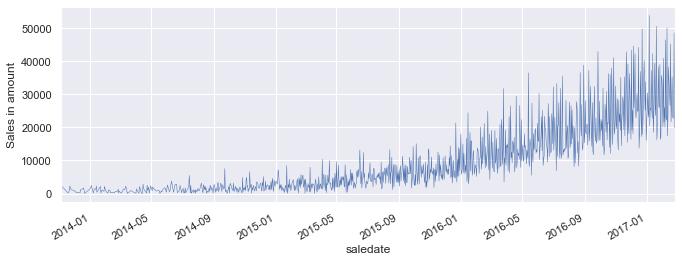

In [56]:
sns.set(rc={'figure.figsize':(11, 4)})
df1['saleamt'].plot(linewidth=.5).set_ylabel('Sales in amount');

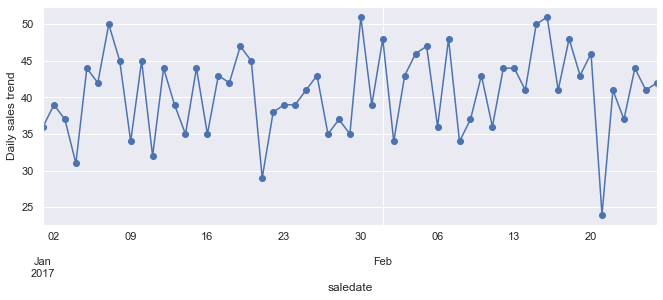

In [10]:
ax = df1.loc['2017', 'salescnt'].plot(marker='o',linestyle='-')
ax.set_ylabel('Daily sales trend');


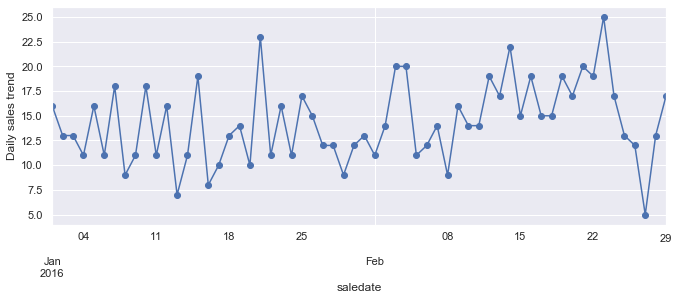

In [69]:
ax = df1.loc['2016-01':'2016-02', 'salescnt'].plot(marker='o',linestyle='-')
ax.set_ylabel('Daily sales trend');

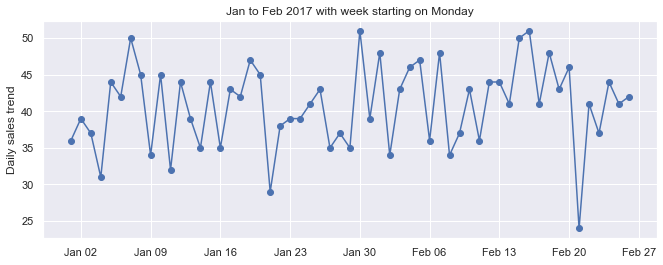

In [59]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1)
ax.plot(df1.loc['2017-01':'2017-02', 'salescnt'], marker='o', linestyle='-')
ax.set_ylabel('Daily sales trend')
ax.set_title('Jan to Feb 2017 with week starting on Monday')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Text(0.5, 1.0, 'Sale trend based on Sale qty')

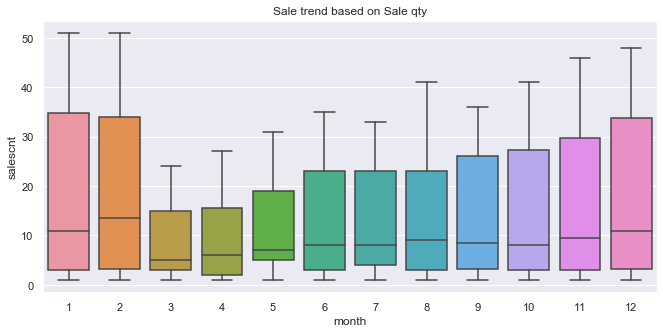

In [65]:
# Monthly Seasonality in Quantity

fig, ax = plt.subplots(figsize=(11, 5), sharex=True)
sns.boxplot(data=df1, x='month', y=name)
ax.set_ylabel('salescnt')
ax.set_title('Sale trend based on Sale qty')
# Remove the automatic x-axis label from all but the bottom subplot
#if ax != axes[-1]:
#ax.set_xlabel('')

Text(0.5, 1.0, 'Sale trend based on Sale amt')

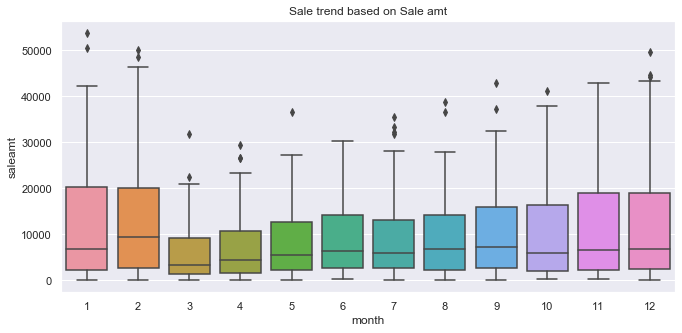

In [63]:
 # Monthly Seasonality in Dollar

fig, ax = plt.subplots(figsize=(11, 5), sharex=True)
sns.boxplot(data=df1, x='month', y='saleamt')
ax.set_ylabel('saleamt')
ax.set_title('Sale trend based on Sale amt')
# Remove the automatic x-axis label from all but the bottom subplot
#if ax != axes[-1]:
#ax.set_xlabel('')

Text(0.5, 1.0, 'Sale trend based on Sale qty weekly')

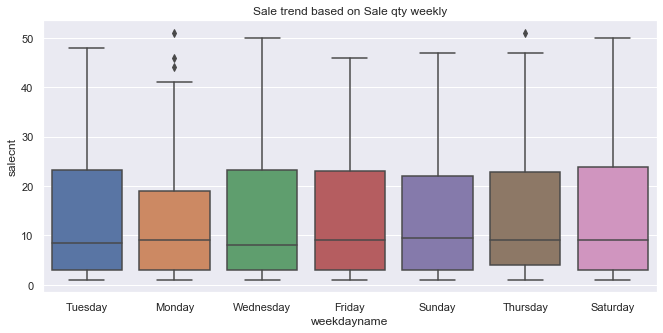

In [66]:
fig, ax = plt.subplots(figsize=(11, 5), sharex=True)
sns.boxplot(data=df1, x='weekdayname', y='salescnt')
ax.set_ylabel('salecnt')
ax.set_title('Sale trend based on Sale qty weekly')
 

Text(0.5, 1.0, 'Sale trend based on Sale amount weekly')

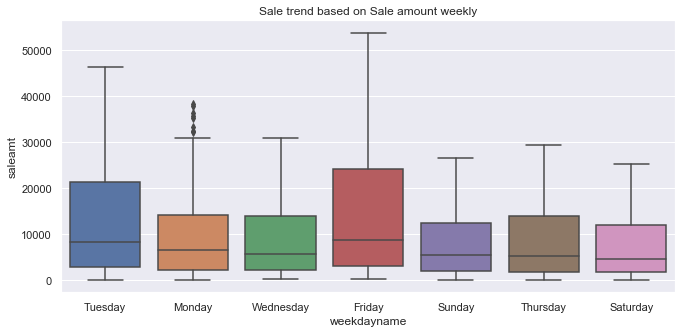

In [67]:
fig, ax = plt.subplots(figsize=(11, 5), sharex=True)
sns.boxplot(data=df1, x='weekdayname', y='saleamt')
ax.set_ylabel('saleamt')
ax.set_title('Sale trend based on Sale amount weekly')
 

In [ ]:
data_columns = ['salescnt', 'saleamt']
df1_mean = df1[data_columns].resample('W').mean()

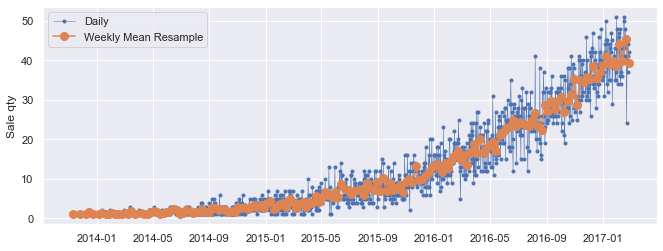

In [100]:
#resampling 

# Start and end of the date range to extract
start, end = '2013-11', '2017-02'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df1.loc[start:end, 'salescnt'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df1_mean.loc[start:end, 'salescnt'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Sale qty')
ax.legend();

In [72]:
sql2= '''

select format(date,'MM/yyyy') as mmyy, count(salesid) salescnt,sum(cast(amount as int)) saleamt
from sale
group by format(date,'MM/yyyy'),year(date),month(date)
order by year(date) asc

'''

df2 = pd.read_sql(sql2,con)



In [74]:
sql3= '''
select format(created_on,'MM/yyyy') as mmyy, count(id) usercnt
from users
group by format(created_on,'MM/yyyy'),year(created_on),month(created_on)
order by year(created_on) asc

'''

df3 = pd.read_sql(sql3,con)

In [79]:
sql4 = '''

select format(created_on,'MM/yyyy') as mmyy, count(campaign) campcnt
from attribution
group by format(created_on,'MM/yyyy'),year(created_on),month(created_on)
order by year(created_on) asc

'''

df4 = pd.read_sql(sql4,con)

In [82]:
dfall = pd.merge(pd.merge(df2,df3,on='mmyy'),df4,on='mmyy')

In [85]:
sql5 = '''

select (convert(varchar(10), created_on, 120) )userdate, count(id) usercnt
from users
group by (convert(varchar(10), created_on, 120)) 
order by (convert(varchar(10), created_on, 120) )

'''
df5 = pd.read_sql(sql5,con)

In [ ]:
df5['userdate']= pd.to_datetime(df5['userdate'])
df5=df5.set_index('userdate')
df5['month'] = df5.index.month
df5['weekdayname'] = df5.index.weekday_name

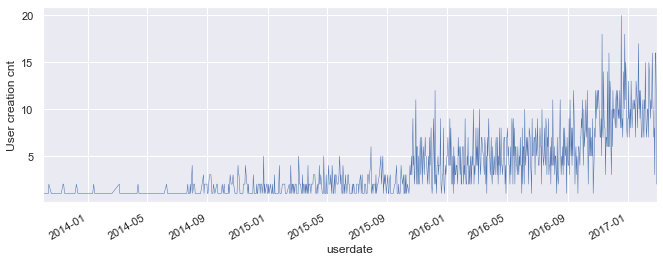

In [90]:
sns.set(rc={'figure.figsize':(11, 4)})
df5['usercnt'].plot(linewidth=.5).set_ylabel('User creation cnt');

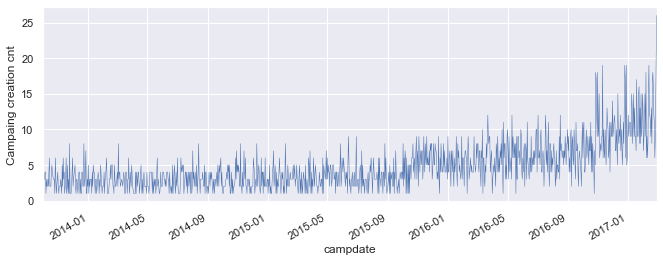

In [104]:
sql6 = ''' 

select (convert(varchar(10), created_on, 120) )campdate, count(campaign) campcnt
from attribution
group by (convert(varchar(10), created_on, 120)) 
order by (convert(varchar(10), created_on, 120) )
'''

df6=pd.read_sql(sql6,con)

df6['campdate']= pd.to_datetime(df6['campdate'])
df6=df6.set_index('campdate')
df6['month'] = df6.index.month
df6['weekdayname'] = df6.index.weekday_name

sns.set(rc={'figure.figsize':(11, 4)})
df6['campcnt'].plot(linewidth=.5).set_ylabel('Campaing creation cnt');



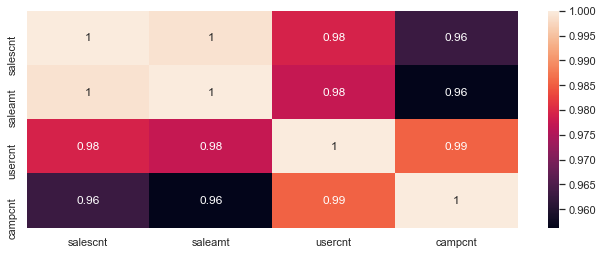

In [101]:
corrMatrix = dfall.corr()
sns.heatmap(corrMatrix, annot=True)